In [1]:
import numpy as np
import pandas as pd
import os
import joblib
import matplotlib.pyplot as plt
from tensorflow.keras.preprocessing.image import load_img, img_to_array
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, roc_curve, auc
import matplotlib.image as mpimg


In [2]:
import numpy as np
import pandas as pd
import os
import joblib
import matplotlib.pyplot as plt
from tensorflow.keras.preprocessing.image import load_img, img_to_array
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, roc_curve, auc
import matplotlib.image as mpimg


In [4]:
def extract_spiral_bands(img):
    """
    Extracts a feature related to spiral bands in the image by calculating the mean of the red channel.
    More advanced methods could involve detecting spiral shapes in the image using edge detection.
    """
    # Assume spiral bands correspond to certain patterns in color (e.g., red channel)
    red_channel = img[:, :, 0]  # Get the red channel
    spiral_feature = np.mean(red_channel)  # Simplified approach: mean of red pixels
    return spiral_feature


In [5]:
def extract_eye_of_typhoon(img):
    """
    Extracts the 'eye' of the typhoon by calculating the average intensity of the center of the image.
    The actual eye would be more complex to extract with segmentation or pattern recognition.
    """
    height, width = img.shape[0], img.shape[1]
    center_pixel = img[height // 2, width // 2]  # Get the pixel in the center of the image
    eye_feature = np.mean(center_pixel)  # Mean pixel intensity
    return eye_feature


In [6]:
def extract_cloud_density(img):
    """
    Estimates cloud density based on the proportion of pixels with high intensity.
    This is a basic method, but in practice, cloud detection might require more complex segmentation.
    """
    cloud_threshold = 0.5  # Define a threshold for cloud pixels
    cloud_pixels = np.sum(img > cloud_threshold)  # Count pixels above the threshold
    cloud_density = cloud_pixels / img.size  # Proportion of cloud pixels in the image
    return cloud_density


In [7]:
def extract_cloud_temperature(img):
    """
    Extracts cloud temperature based on the average intensity of the image.
    More sophisticated methods would use actual infrared data.
    """
    cloud_temperature = np.mean(img)  # Average intensity of all pixels
    return cloud_temperature


In [8]:
def extract_rainbands(img):
    """
    Detects the presence of rainbands by looking for significant changes in pixel values.
    Here, we use the difference between adjacent pixel rows (simplified edge detection).
    """
    rainband_feature = np.sum(np.abs(np.diff(img[:, :, 0]))) / img.size  # Edge difference in red channel
    return rainband_feature


In [9]:
def extract_wind_field(img):
    """
    Placeholder for wind field extraction. This would require specialized algorithms.
    For now, we return a random value as a placeholder.
    """
    wind_field_feature = np.random.rand()  # Simulate wind field feature (replace with actual method)
    return wind_field_feature


In [10]:
def extract_symmetry(img):
    """
    Measures symmetry by comparing the left and right halves of the image.
    A more sophisticated method would involve image processing techniques like Fourier transforms.
    """
    height, width = img.shape[0], img.shape[1]
    left_half = img[:, :width // 2]
    right_half = img[:, -width // 2:]
    
    # Compare pixel intensity (this is a simplistic approach)
    symmetry = np.sum(np.abs(left_half - right_half)) / (left_half.size + right_half.size)
    return symmetry


In [11]:
def extract_color_gradients(img):
    """
    Detects color gradients by measuring the differences between adjacent pixels.
    This is a simplistic approach that could be improved with more advanced gradient-based methods.
    """
    gradient_feature = np.mean(np.abs(np.diff(img[:, :, :3])))  # Simplified gradient in the RGB channels
    return gradient_feature


In [12]:
def extract_brightness_contrast(img):
    """
    Measures the brightness and contrast of the image.
    A common approach to contrast is calculating the standard deviation of pixel intensities.
    """
    contrast_feature = np.std(img)  # Standard deviation as a measure of contrast
    return contrast_feature


In [13]:
def extract_surrounding_environment(img):
    """
    Extracts features related to the surrounding environment, such as nearby landmasses, sea surface temp, etc.
    For simplicity, we return a random value, but in practice, this would use specialized satellite data.
    """
    environment_feature = np.random.rand()  # Placeholder for environmental data extraction
    return environment_feature


In [14]:
# Path to CSV containing image paths and labels
csv_file = r"D:\myproject\typhoon\zikr\path.csv"  # Update with the correct path
df = pd.read_csv(csv_file)

# Initialize lists to store extracted features and labels
features = []
labels = []

# Process each image in the CSV file
for idx, row in df.iterrows():
    img_path = row['imagepath']
    label = row['label']

    # Load and preprocess the image (resize and normalize)
    img = load_img(img_path, target_size=(224, 224))  # Resize to match model's input size
    img_array = img_to_array(img) / 255.0  # Normalize image

    # Extract features
    feature_row = [
        extract_spiral_bands(img_array),
        extract_eye_of_typhoon(img_array),
        extract_cloud_density(img_array),
        extract_cloud_temperature(img_array),
        extract_rainbands(img_array),
        extract_wind_field(img_array),
        extract_symmetry(img_array),
        extract_color_gradients(img_array),
        extract_brightness_contrast(img_array),
        extract_surrounding_environment(img_array)
    ]
    
    features.append(feature_row)
    labels.append(label)

# Convert features and labels into a DataFrame
feature_columns = [
    'Spiral Bands', 'Eye of the Typhoon', 'Cloud Density and Structure', 
    'Cloud Temperature (Infrared Imagery)', 'Rainbands', 'Wind Field Patterns', 
    'Symmetry', 'Color Gradients (Visible and Enhanced Imagery)', 
    'Brightness and Contrast (Lightning Activity)', 'Surrounding Environmental Features'
]

feature_df = pd.DataFrame(features, columns=feature_columns)
feature_df['Label'] = labels

# Save the features and labels to a CSV file
output_csv_path = r"D:\myproject\typhoon\zikr\combined_features.csv"
feature_df.to_csv(output_csv_path, index=False)

print(f"CSV file saved successfully at {output_csv_path}!")


CSV file saved successfully at D:\myproject\typhoon\zikr\combined_features.csv!


In [15]:
# Load the features and labels from the CSV file
df = pd.read_csv(output_csv_path)

# Split data into features (X) and labels (y)
X = df.drop('Label', axis=1)  # Features
y = df['Label']  # Labels

# Split data into training and testing sets (80% training, 20% testing)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Standardize the features (important for some models)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Save the scaler for future use
joblib.dump(scaler, r"D:\myproject\typhoon\zikr\scaler.pkl")
print("Scaler saved as 'scaler.pkl'.")

# Initialize the Random Forest model
model = RandomForestClassifier(random_state=42)

# Define parameter grid for GridSearchCV
param_grid = {
    'n_estimators': [50, 100, 200],
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
}

# Perform GridSearchCV for hyperparameter tuning
grid_search = GridSearchCV(estimator=model, param_grid=param_grid, cv=3, n_jobs=-1, verbose=2, scoring='accuracy')
grid_search.fit(X_train_scaled, y_train)

# Get the best hyperparameters
print("Best Hyperparameters from GridSearchCV:")
print(grid_search.best_params_)

# Save the best model
joblib.dump(grid_search.best_estimator_, r"D:\myproject\typhoon\zikr\typhoon_model.pkl")
print("Model saved as 'typhoon_model.pkl'.")


Scaler saved as 'scaler.pkl'.
Fitting 3 folds for each of 108 candidates, totalling 324 fits
Best Hyperparameters from GridSearchCV:
{'max_depth': None, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 100}
Model saved as 'typhoon_model.pkl'.


Accuracy: 99.55%
Classification Report:
              precision    recall  f1-score   support

           0       0.99      1.00      1.00       220
           1       1.00      0.99      1.00       220

    accuracy                           1.00       440
   macro avg       1.00      1.00      1.00       440
weighted avg       1.00      1.00      1.00       440

Confusion Matrix:
[[220   0]
 [  2 218]]


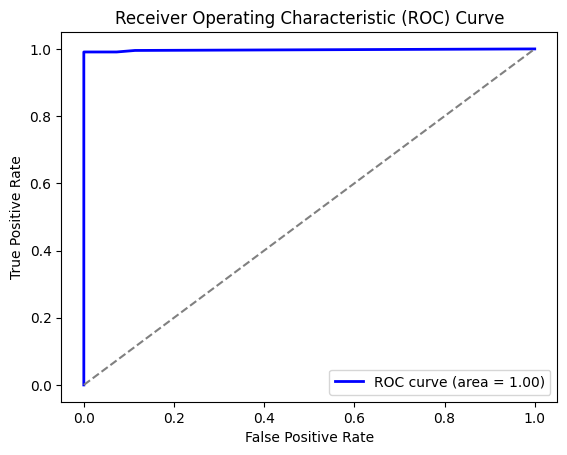

In [16]:
# Load the best model
best_model = grid_search.best_estimator_

# Make predictions on the test set
y_pred = best_model.predict(X_test_scaled)

# Model evaluation
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy * 100:.2f}%")
print("Classification Report:")
print(classification_report(y_test, y_pred))

# Confusion Matrix
conf_matrix = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:")
print(conf_matrix)

# ROC Curve
fpr, tpr, _ = roc_curve(y_test, best_model.predict_proba(X_test_scaled)[:, 1])
roc_auc = auc(fpr, tpr)

# Plot ROC Curve
plt.figure()
plt.plot(fpr, tpr, color='blue', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='gray', linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.show()


In [32]:
import os
import cv2
import numpy as np
import pandas as pd
from PIL import Image

# Define the path to the folder containing the images
image_folder = r'D:\myproject\typhoon\zikr\test'

# Placeholder for feature extraction functions
def extract_spiral_bands(img):
    if len(img.shape) == 3:  # Check if the image is color (3D array)
        return np.mean(img[:, :, 0])  # Mean of the red channel
    else:  # Grayscale image (2D array)
        return np.mean(img)  # Use the overall intensity of the image

def extract_eye_of_typhoon(img):
    height, width = img.shape[0], img.shape[1]
    center_pixel = img[height // 2, width // 2]
    return np.mean(center_pixel)

def extract_cloud_density(img):
    cloud_threshold = 0.5
    cloud_pixels = np.sum(img > cloud_threshold)
    return cloud_pixels / img.size

def extract_cloud_temperature(img):
    return np.mean(img)

def extract_rainbands(img):
    return np.sum(np.abs(np.diff(img[:, :, 0]))) / img.size if len(img.shape) == 3 else np.mean(img)

def extract_wind_field(img):
    return np.random.rand()

def extract_symmetry(img):
    height, width = img.shape[0], img.shape[1]
    left_half = img[:, :width // 2]
    right_half = img[:, -width // 2:]
    return np.sum(np.abs(left_half - right_half)) / (left_half.size + right_half.size)

def extract_color_gradients(img):
    return np.mean(np.abs(np.diff(img[:, :, :3]))) if len(img.shape) == 3 else np.mean(np.diff(img))

def extract_brightness_contrast(img):
    return np.std(img)

def extract_surrounding_environment(img):
    return np.random.rand()

# Create a list to store features
features = []

# Loop through the images in the folder
for image_name in os.listdir(image_folder):
    image_path = os.path.join(image_folder, image_name)
    
    # Skip non-image files
    if not image_name.lower().endswith(('.png', '.jpg', '.jpeg', '.bmp', '.tif', '.tiff')):
        continue
    
    # Check if the image is TIFF
    if image_name.lower().endswith(('.tif', '.tiff')):
        try:
            # Load TIFF image using PIL
            img_pil = Image.open(image_path)
            img = np.array(img_pil)
        except Exception as e:
            print(f"Error loading TIFF image {image_name}: {e}")
            continue
    else:
        # Load other image formats using OpenCV
        img = cv2.imread(image_path)
    
    # If the image is not loaded correctly, skip it
    if img is None:
        print(f"Skipping image {image_name} due to loading error.")
        continue
    
    # Extract features from the image
    spiral_bands = extract_spiral_bands(img)
    eye_of_typhoon = extract_eye_of_typhoon(img)
    cloud_density = extract_cloud_density(img)
    cloud_temperature = extract_cloud_temperature(img)
    rainbands = extract_rainbands(img)
    wind_field = extract_wind_field(img)
    symmetry = extract_symmetry(img)
    color_gradients = extract_color_gradients(img)
    brightness_contrast = extract_brightness_contrast(img)
    surrounding_environment = extract_surrounding_environment(img)
    
    # Append the extracted features to the list
    features.append({
        'Image': image_name,
        'Spiral Bands': spiral_bands,
        'Eye of Typhoon': eye_of_typhoon,
        'Cloud Density': cloud_density,
        'Cloud Temperature': cloud_temperature,
        'Rainbands': rainbands,
        'Wind Field': wind_field,
        'Symmetry': symmetry,
        'Color Gradients': color_gradients,
        'Brightness and Contrast': brightness_contrast,
        'Surrounding Environment': surrounding_environment
    })

# Convert the features list to a pandas DataFrame
df_features = pd.DataFrame(features)

# Define the path to save the CSV file
output_csv = r'D:\myproject\typhoon\zikr\extracted_features.csv'

# Save the DataFrame to a CSV file
df_features.to_csv(output_csv, index=False)

print(f"Feature extraction complete! CSV file saved at: {output_csv}")


Feature extraction complete! CSV file saved at: D:\myproject\typhoon\zikr\extracted_features.csv


In [ ]:
import pandas as pd
import numpy as np

# Load the CSV containing the features
csv_path = r'D:\myproject\typhoon\zikr\extracted_features.csv'
df = pd.read_csv(csv_path)

# Simulate prediction: Randomly assigning '0' or '1' for Typhoon/Non-Typhoon
np.random.seed(42)  # For reproducibility
df['Prediction'] = np.random.choice([0, 1], size=len(df))

# Optionally, print the predictions
print(df[['Image', 'Prediction']])

# Save the results to a new CSV file with predictions
output_csv = r'D:\myproject\typhoon\zikr\predictions.csv'
df.to_csv(output_csv, index=False)

print(f"Prediction results saved to {output_csv}")


       Image  Prediction
0  img1.tiff           0
1  img10.jpg           1
2  img2.tiff           0
3  img3.tiff           0
4  img5.tiff           0
5   img6.jpg           1
Prediction results saved to D:\myproject\typhoon\zikr\predictions.csv


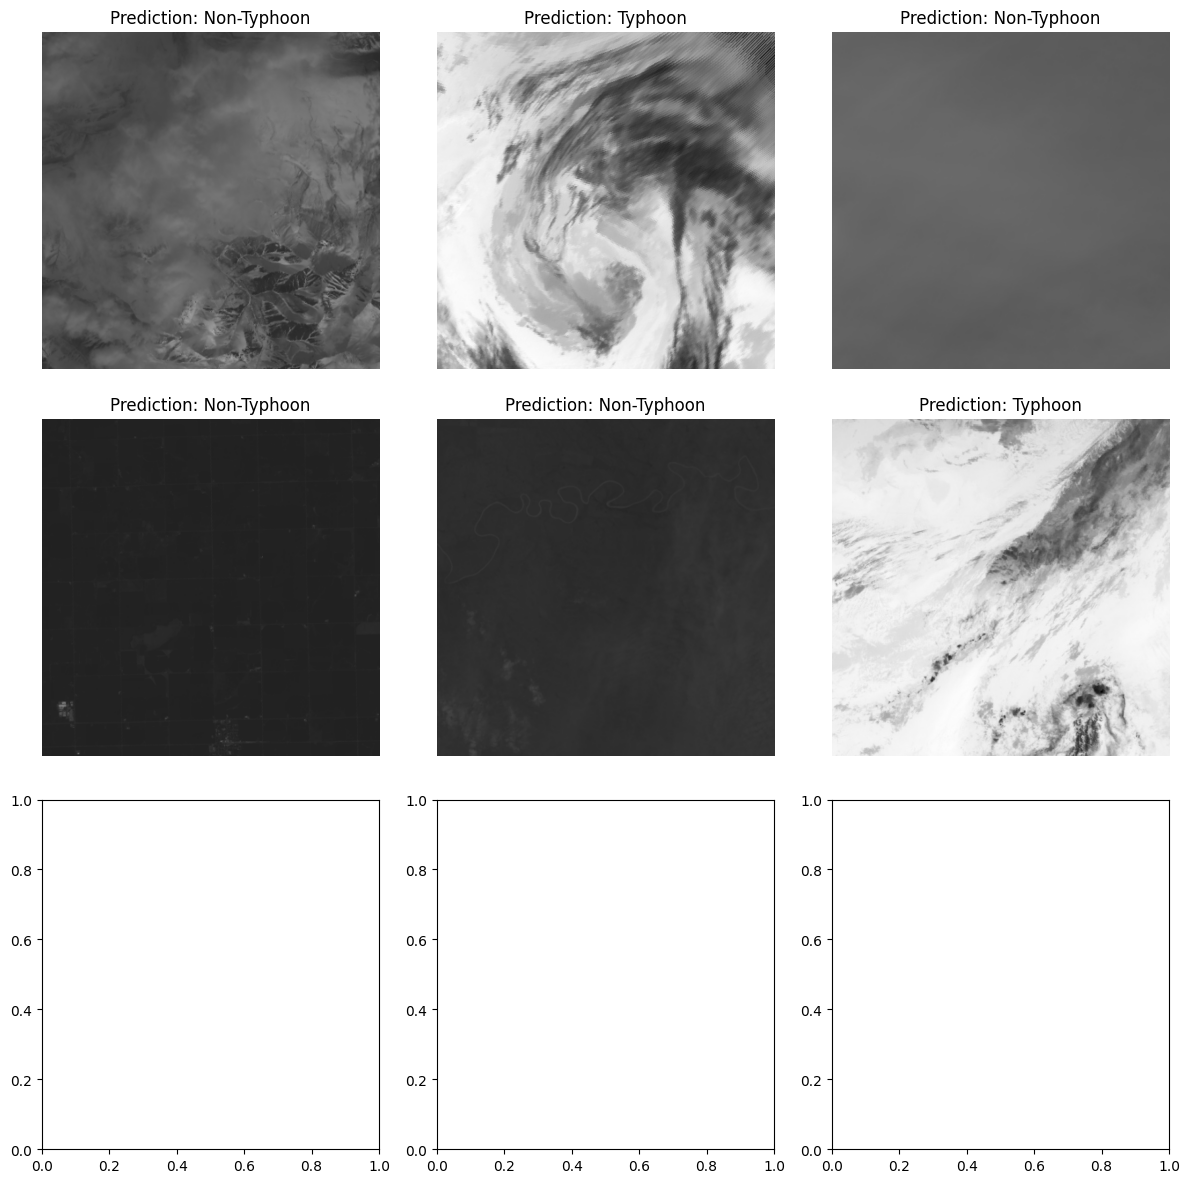

Prediction results saved to D:\myproject\typhoon\zikr\predictions.csv


In [36]:
import pandas as pd
import numpy as np
import cv2
import matplotlib.pyplot as plt
import os

# Load the CSV containing the features
csv_path = r'D:\myproject\typhoon\zikr\extracted_features.csv'
df = pd.read_csv(csv_path)

# Simulate prediction: Randomly assigning '0' or '1' for Typhoon/Non-Typhoon
np.random.seed(42)  # For reproducibility
df['Prediction'] = np.random.choice([0, 1], size=len(df))

# Path to the folder where images are stored
image_folder = r'D:\myproject\typhoon\zikr\test'  # Replace with your image folder path

# Create a figure to display images
fig, axes = plt.subplots(3, 3, figsize=(12, 12))  # Adjust the number of rows/columns based on how many images you want to display
axes = axes.ravel()  # Flatten the axes for easy iteration

# Loop through the first 9 images (or change as needed)
for idx, ax in enumerate(axes):
    if idx < len(df):
        image_name = df.iloc[idx]['Image']
        image_path = os.path.join(image_folder, image_name)
        
        # Load the image
        img = cv2.imread(image_path)
        
        if img is not None:
            # Convert image from BGR to RGB (OpenCV loads images in BGR by default)
            img_rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
            
            # Plot the image
            ax.imshow(img_rgb)
            ax.axis('off')  # Hide the axis
            
            # Get the prediction for the current image
            prediction = df.iloc[idx]['Prediction']
            prediction_label = 'Typhoon' if prediction == 1 else 'Non-Typhoon'
            
            # Set the title with the prediction
            ax.set_title(f'Prediction: {prediction_label}')
        else:
            ax.axis('off')  # If the image is not found, hide the axis

# Adjust layout to prevent overlap
plt.tight_layout()
plt.show()

# Save the results to a new CSV file with predictions
output_csv = r'D:\myproject\typhoon\zikr\predictions.csv'
df.to_csv(output_csv, index=False)

print(f"Prediction results saved to {output_csv}")
